In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
import pandas as pd

def load_solar_flare(file_path):
    rows = []
    with open(file_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 12:
                rows.append(parts[:12])
    return pd.DataFrame(rows)

df1 = load_solar_flare("flare.data1")
df2 = load_solar_flare("flare.data2")

df = pd.concat([df1, df2], ignore_index=True)

df.columns = [
    'code',
    'largest_spot_size',
    'spot_distribution',
    'activity',
    'evolution',
    'previous_activity',
    'complexity',
    'area',
    'largest_spot',
    'c_class_flares',
    'm_class_flares',
    'x_class_flares'
]

df.head()

,code,largest_spot_size,spot_distribution,activity,evolution,previous_activity,complexity,area,largest_spot,c_class_flares,m_class_flares,x_class_flares
0,C,S,O,1,2,1,1,2,1,2,0,0
1,D,S,O,1,3,1,1,2,1,2,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0
3,D,S,O,1,3,1,1,2,1,2,0,0
4,D,A,O,1,3,1,1,2,1,2,0,0


In [ ]:
import os

size_data1 = os.path.getsize("flare.data1") / (1024 * 1024)
size_data2 = os.path.getsize("flare.data2") / (1024 * 1024)

print(f"Ukuran flare.data1: {size_data1:.2f} MB")
print(f"Ukuran flare.data2: {size_data2:.2f} MB")
print(f"Total ukuran dataset: {size_data1 + size_data2:.2f} MB")
print("=== INFORMASI DATASET SOLAR FLARE ===")
print(f"Jumlah Baris  : {df.shape[0]}")
print(f"Jumlah Kolom  : {df.shape[1]}")

print("\n--- Info Tipe Data Awal ---")
df.info()


Ukuran flare.data1: 0.01 MB
Ukuran flare.data2: 0.03 MB
Total ukuran dataset: 0.03 MB
=== INFORMASI DATASET SOLAR FLARE ===
Jumlah Baris  : 1389
Jumlah Kolom  : 12

--- Info Tipe Data Awal ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   code               1389 non-null   object
 1   largest_spot_size  1389 non-null   object
 2   spot_distribution  1389 non-null   object
 3   activity           1389 non-null   object
 4   evolution          1389 non-null   object
 5   previous_activity  1389 non-null   object
 6   complexity         1389 non-null   object
 7   area               1389 non-null   object
 8   largest_spot       1389 non-null   object
 9   c_class_flares     1389 non-null   object
 10  m_class_flares     1389 non-null   object
 11  x_class_flares     1389 non-null   object
dtypes: object(12)
memory usage: 130.3+ KB

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# ==========================================
# 1. LOAD & GABUNGKAN DATASET
# ==========================================

# Daftar nama kolom (sesuai dokumentasi Solar Flare)
column_names = [
    'class', 'largest_spot_size', 'spot_distribution', 'activity', 'evolution',
    'prev24h_flare', 'hist_complex', 'became_hist_complex', 'area',
    'area_largest', 'c_class_flares', 'm_class_flares', 'x_class_flares'
]

try:
    # Membaca file 1 dan 2
    df1 = pd.read_csv('flare.data1', sep='\s+', names=column_names, header=None, skiprows=1)
    df2 = pd.read_csv('flare.data2', sep='\s+', names=column_names, header=None, skiprows=1)

    # Menggabungkan kedua dataframe
    df = pd.concat([df1, df2], ignore_index=True)

    print(f"Data berhasil dimuat! Total baris data: {len(df)}")

except FileNotFoundError:
    print("Error: File 'flare.data1' atau 'flare.data2' tidak ditemukan.")
    raise

# ==========================================
# 2. PREPROCESSING (Label Encoding untuk Korelasi)
# ==========================================
df_processed = df.copy()
le = LabelEncoder()

# Kolom kategori yang perlu diubah jadi angka untuk Heatmap
cat_cols = ['class', 'largest_spot_size', 'spot_distribution']

for col in cat_cols:
    df_processed[col] = df_processed[col].astype(str)
    df_processed[col] = le.fit_transform(df_processed[col])

Data berhasil dimuat! Total baris data: 1389


<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3608374079.py:19: SyntaxWarning: invalid escape sequence '\s'
  df1 = pd.read_csv('flare.data1', sep='\s+', names=column_names, header=None, skiprows=1)
/tmp/ipython-input-3608374079.py:20: SyntaxWarning: invalid escape sequence '\s'
  df2 = pd.read_csv('flare.data2', sep='\s+', names=column_names, header=None, skiprows=1)


/tmp/ipython-input-3222238488.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=flare_counts.index, y=flare_counts.values, palette='viridis')


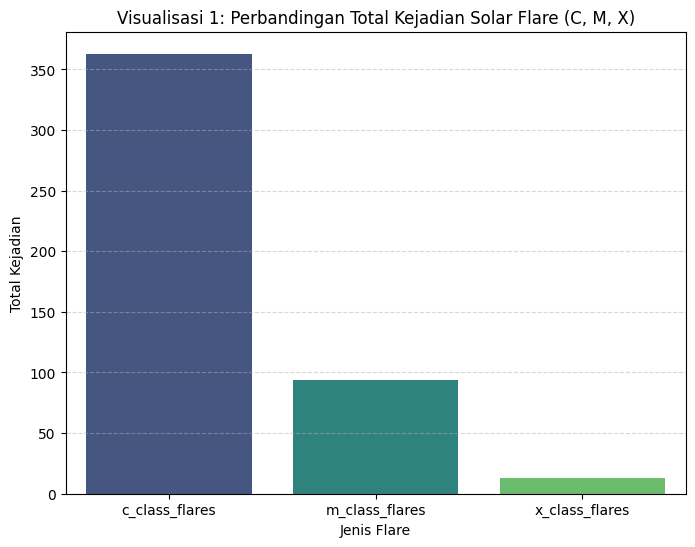

In [5]:
# ==========================================
# 3. VISUALISASI 1: Bar Plot Distribusi Flare
# ==========================================

plt.figure(figsize=(8, 6))
# Menjumlahkan total kejadian masing-masing kelas flare
flare_counts = df[['c_class_flares', 'm_class_flares', 'x_class_flares']].sum()

sns.barplot(x=flare_counts.index, y=flare_counts.values, palette='viridis')

plt.title('Visualisasi 1: Perbandingan Total Kejadian Solar Flare (C, M, X)')
plt.xlabel('Jenis Flare')
plt.ylabel('Total Kejadian')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

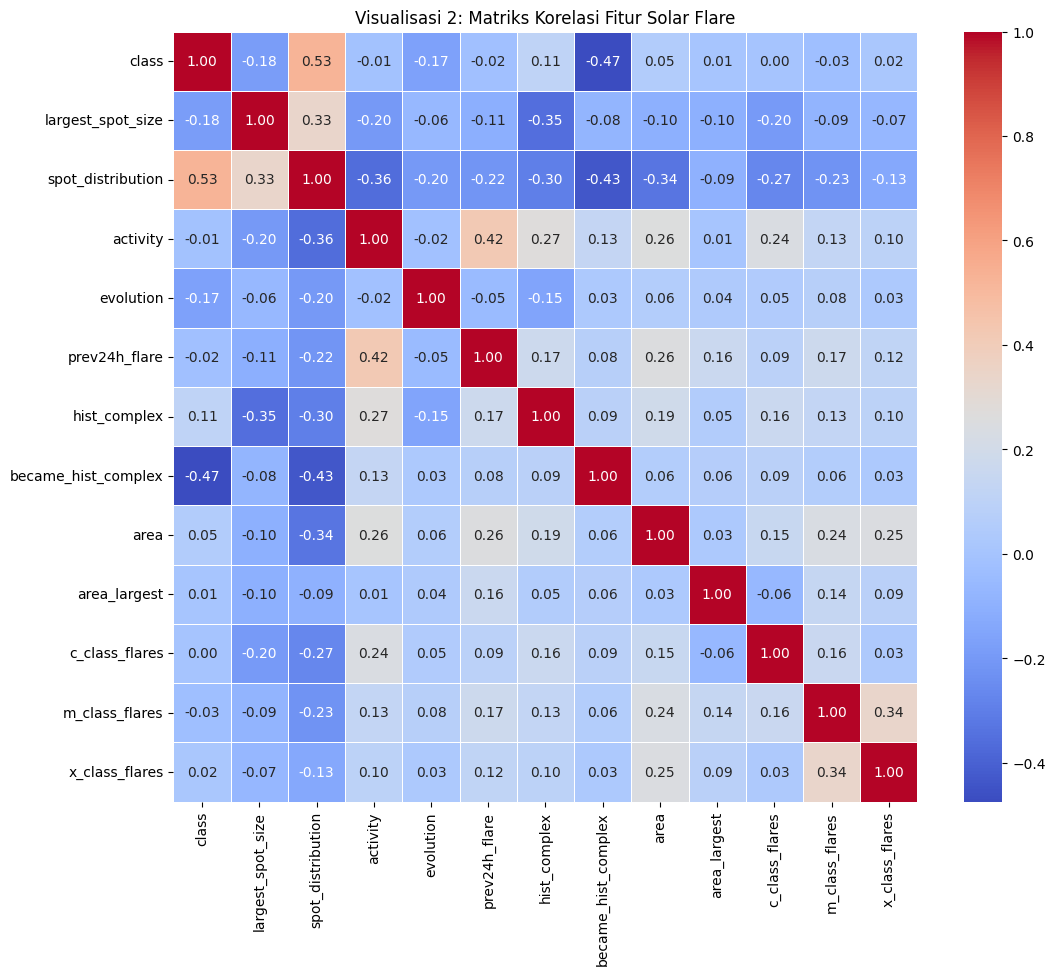

In [7]:
# ==========================================
# 3. VISUALISASI 2: Heatmap Korelasi
# ==========================================

plt.figure(figsize=(12, 10))

# Menghitung korelasi menggunakan data yang sudah di-encode
corr_matrix = df_processed.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Visualisasi 2: Matriks Korelasi Fitur Solar Flare')
plt.show()

/tmp/ipython-input-2578778967.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='largest_spot_size', y='c_class_flares', order=order_size, palette='Set2')


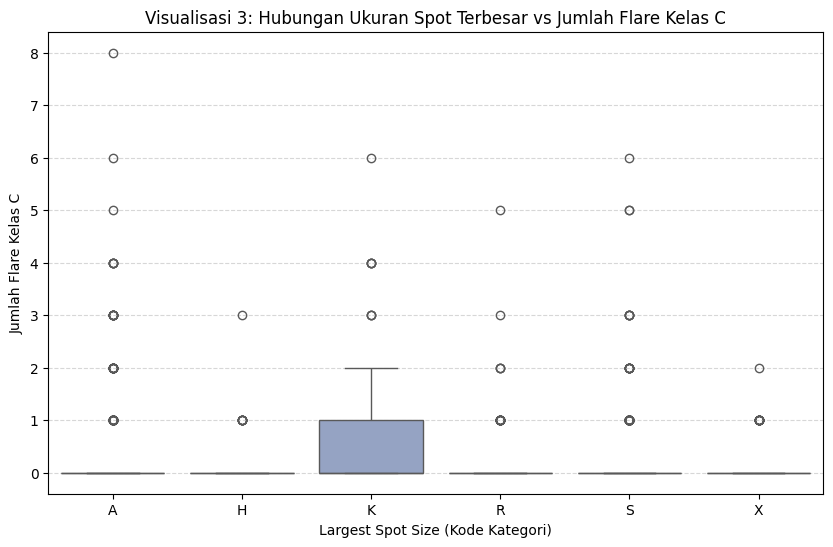

In [8]:
# ==========================================
# 3. VISUALISASI 3: Boxplot Hubungan Spot Size vs C-Class
# ==========================================

plt.figure(figsize=(10, 6))

# Mengurutkan label agar rapi di grafik
if df['largest_spot_size'].dtype == 'object':
    # Menggunakan data asli (df) karena kita ingin label kategori aslinya
    order_size = sorted(df['largest_spot_size'].unique())
else:
    order_size = None

sns.boxplot(data=df, x='largest_spot_size', y='c_class_flares', order=order_size, palette='Set2')

plt.title('Visualisasi 3: Hubungan Ukuran Spot Terbesar vs Jumlah Flare Kelas C')
plt.xlabel('Largest Spot Size (Kode Kategori)')
plt.ylabel('Jumlah Flare Kelas C')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Missing values per kolom:
Jumlah data sebelum menghapus duplikasi: 525
Jumlah data setelah menghapus duplikasi: 525
<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 0 to 1381
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   code               525 non-null    object
 1   largest_spot_size  525 non-null    object
 2   spot_distribution  525 non-null    object
 3   activity           525 non-null    object
 4   evolution          525 non-null    object
 5   previous_activity  525 non-null    object
 6   complexity         525 non-null    object
 7   area               525 non-null    object
 8   largest_spot       525 non-null    object
 9   c_class_flares     525 non-null    int64 
 10  m_class_flares     525 non-null    int64 
 11  x_class_flares     525 non-null    int64 
dtypes: int64(3), object(9)
memory usage: 53.3+ KB


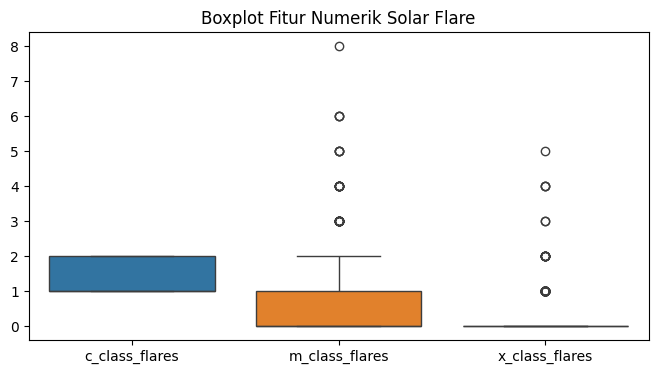

In [ ]:
#@title Data Cleaning
# Cek missing values
print("Missing values per kolom:")
df.isnull().sum()
#removing duplicate
print("Jumlah data sebelum menghapus duplikasi:", df.shape[0])
df = df.drop_duplicates()
print("Jumlah data setelah menghapus duplikasi:", df.shape[0])
# Konversi kolom flare ke numerik
flare_cols = ['c_class_flares', 'm_class_flares', 'x_class_flares']

df[flare_cols] = df[flare_cols].apply(pd.to_numeric)

# Cek ulang tipe data
df.info()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(data=df[flare_cols])
plt.title("Boxplot Fitur Numerik Solar Flare")
plt.show()


In [ ]:
#@title Feature Engineering
# Membuat target berdasarkan flare paling kuat
def flare_severity(row):
    if row['x_class_flares'] > 0:
        return 'High'
    elif row['m_class_flares'] > 0:
        return 'Medium'
    else:
        return 'Low'

df['flare_severity'] = df.apply(flare_severity, axis=1)

df['flare_severity'].value_counts()

# Drop kolom yang menyebabkan data leakage
X = df.drop(columns=[
    'c_class_flares',
    'm_class_flares',
    'x_class_flares',
    'flare_severity'
])

y = df['flare_severity']


In [ ]:
#@title Data Transformation
from sklearn.preprocessing import LabelEncoder

# Identifikasi kolom kategorikal
categorical_cols = X.select_dtypes(include='object').columns
print("Kolom kategorikal:", list(categorical_cols))

# Label Encoding
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le
# Encoding target
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)

print("Kelas target:", target_encoder.classes_)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Shape data setelah scaling:", X_scaled.shape)
print("Contoh data setelah transformasi:")
print(X_scaled[:5])

print("\nContoh label setelah encoding:")
print(y_encoded[:10])



Kolom kategorikal: []
Kelas target: ['High' 'Low' 'Medium']
Shape data setelah scaling: (525, 9)
Contoh data setelah transformasi:
[[-1.01745781  0.99399548  0.45319606 -0.69200668 -0.63190463 -0.36313177
  -1.1867      0.24180104 -0.26314718]
 [-0.34215396  0.99399548  0.45319606 -0.69200668  0.93295353 -0.36313177
  -1.1867      0.24180104 -0.26314718]
 [-1.01745781  0.99399548  0.45319606 -0.69200668  0.93295353 -0.36313177
  -1.1867      0.24180104 -0.26314718]
 [-0.34215396 -1.31251337  0.45319606 -0.69200668  0.93295353 -0.36313177
  -1.1867      0.24180104 -0.26314718]
 [-0.34215396 -1.31251337  0.45319606 -0.69200668 -0.63190463 -0.36313177
  -1.1867      0.24180104 -0.26314718]]

Contoh label setelah encoding:
[1 1 1 1 1 1 1 1 1 1]


In [ ]:
#@title Data Splitting
from sklearn.model_selection import train_test_split

# Memisahkan fitur dan target
X = df.drop(columns=['flare_severity'])
y = df['flare_severity']

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

# Informasi jumlah data
print("Jumlah data keseluruhan :", df.shape[0])
print("Jumlah data training    :", X_train.shape[0])
print("Jumlah data testing     :", X_test.shape[0])


Jumlah data keseluruhan : 525
Jumlah data training    : 420
Jumlah data testing     : 105


In [ ]:
#@title Data Balancing
from sklearn.preprocessing import LabelEncoder

# Salin data agar aman
X_encoded = X_train.copy()

# Encoding semua kolom kategorikal
label_encoders = {}

for col in X_encoded.columns:
    if X_encoded[col].dtype == 'object':
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col])
        label_encoders[col] = le
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_encoded_scaled = scaler.fit_transform(X_encoded)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_balanced, y_train_balanced = smote.fit_resample(
    X_encoded_scaled, y_train
)

print("Distribusi sebelum SMOTE:")
print(y_train.value_counts())

print("\nDistribusi setelah SMOTE:")
print(y_train_balanced.value_counts())



Distribusi sebelum SMOTE:
flare_severity
Low       246
Medium    121
High       53
Name: count, dtype: int64

Distribusi setelah SMOTE:
flare_severity
Medium    246
Low       246
High      246
Name: count, dtype: int64


In [10]:
#@title Model 1 - Baseline Model: Logistic Regresion
import pandas as pd
import time
import joblib
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# ==========================================
# 0. PERSIAPAN DATASET SOLAR FLARE (Wajib Dijalankan Pertama)
# ==========================================

# A. Load dan Gabungkan Data (Menggunakan asumsi yang sama seperti sebelumnya)
column_names = [
    'class', 'largest_spot_size', 'spot_distribution', 'activity', 'evolution',
    'prev24h_flare', 'hist_complex', 'became_hist_complex', 'area',
    'area_largest', 'c_class_flares', 'm_class_flares', 'x_class_flares'
]

try:
    df1 = pd.read_csv('flare.data1', sep='\s+', names=column_names, header=None, skiprows=1)
    df2 = pd.read_csv('flare.data2', sep='\s+', names=column_names, header=None, skiprows=1)
    df = pd.concat([df1, df2], ignore_index=True)
    print(f"Data berhasil dimuat! Total baris: {len(df)}")
except FileNotFoundError:
    print("Error: File 'flare.data1' atau 'flare.data2' tidak ditemukan.")
    raise

# B. Definisi Target Biner (Klasifikasi: Flare Kuat vs Tidak Flare Kuat)
# Target y = 1 jika M-class flares > 0 atau X-class flares > 0 (Flare Kuat)
# Target y = 0 jika hanya C-class atau 0 (Tidak Flare Kuat)
df['strong_flare'] = np.where((df['m_class_flares'] > 0) | (df['x_class_flares'] > 0), 1, 0)
print(f"Distribusi Target Biner:\n{df['strong_flare'].value_counts()}")

# C. Preprocessing Fitur (Handling Kategori dan Drop Kolom Target Asli)
df_processed = df.drop(columns=['c_class_flares', 'm_class_flares', 'x_class_flares'])

le = LabelEncoder()
cat_cols = ['class', 'largest_spot_size', 'spot_distribution']
for col in cat_cols:
    df_processed[col] = le.fit_transform(df_processed[col].astype(str))

# D. Memisahkan Fitur (X) dan Target (y)
X = df_processed.drop(columns=['strong_flare'])
y = df_processed['strong_flare']

# E. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# F. Scaling Fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# ==========================================
# 1. MODEL LOGISTIC REGRESSION (Mengikuti Format Anda)
# ==========================================

print("\n" + "="*50)
print("Training Model 1: Logistic Regression (Dataset Solar Flare)...")
print("="*50)
start_time = time.time()

# 1. Inisialisasi Model
# random_state=42 agar hasil konsisten
model_logreg = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced')
# Catatan: class_weight='balanced' ditambahkan karena data Solar Flare sangat imbalanced.

# 2. Training (Wajib pakai data yang sudah di-scaling!)
model_logreg.fit(X_train_scaled, y_train)

# 3. Prediksi
y_pred_logreg = model_logreg.predict(X_test_scaled)

# 4. Hitung Waktu & Akurasi
logreg_time = time.time() - start_time
acc_logreg = accuracy_score(y_test, y_pred_logreg)

print(f"Selesai dalam {logreg_time:.4f} detik")
print(f"Akurasi Logistic Regression: {acc_logreg*100:.2f}%")
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_logreg))


# --- BAGIAN SIMPAN & UNDUH ---

# A. Simpan Model (.pkl)
model_filename = 'model_solar_flare_logreg.pkl'
joblib.dump(model_logreg, model_filename)
print(f"\nModel disimpan sebagai {model_filename}")

# B. Simpan Hasil Uji ke CSV (Prediksi vs Asli)
df_hasil = pd.DataFrame({
    'Actual_Strong_Flare': y_test.values,
    'Predicted_Strong_Flare': y_pred_logreg
})
result_filename = 'hasil_uji_solar_flare_logreg.csv'
df_hasil.to_csv(result_filename, index=False)
print(f"Hasil uji disimpan sebagai {result_filename}")

# C. Perintah Unduh (Khusus Google Colab)
print("Sedang mengunduh file...")
# files.download(model_filename)
# files.download(result_filename)
print("PERHATIAN: Perintah 'files.download()' dikomentari. Hapus komentar untuk mengunduh di Colab.")

Data berhasil dimuat! Total baris: 1389
Distribusi Target Biner:
strong_flare
0    1316
1      73
Name: count, dtype: int64

Training Model 1: Logistic Regression (Dataset Solar Flare)...
Selesai dalam 0.0065 detik
Akurasi Logistic Regression: 76.62%

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.98      0.77      0.86       263
           1       0.14      0.67      0.24        15

    accuracy                           0.77       278
   macro avg       0.56      0.72      0.55       278
weighted avg       0.93      0.77      0.83       278


Model disimpan sebagai model_solar_flare_logreg.pkl
Hasil uji disimpan sebagai hasil_uji_solar_flare_logreg.csv
Sedang mengunduh file...
PERHATIAN: Perintah 'files.download()' dikomentari. Hapus komentar untuk mengunduh di Colab.


<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2988360303.py:24: SyntaxWarning: invalid escape sequence '\s'
  df1 = pd.read_csv('flare.data1', sep='\s+', names=column_names, header=None, skiprows=1)
/tmp/ipython-input-2988360303.py:25: SyntaxWarning: invalid escape sequence '\s'
  df2 = pd.read_csv('flare.data2', sep='\s+', names=column_names, header=None, skiprows=1)


In [12]:
#@title Model 2 - Random Forest
import time
import joblib
from google.colab import files
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Asumsi: X_train, X_test, y_train, y_test, dan joblib sudah didefinisikan
# dari langkah preprocessing sebelumnya (termasuk definisi target biner 'strong_flare').

# Catatan: Karena Random Forest tidak wajib scaling, kita bisa menggunakan
# data asli X_train dan X_test yang sudah di-Label Encode, bukan X_train_scaled.

# ==========================================
# 1. MODEL RANDOM FOREST (Mengikuti Format Anda)
# ==========================================

print("\n" + "="*50)
print("Training Model 2: Random Forest (Dataset Solar Flare)...")
print("="*50)
start_time = time.time()

# 1. Inisialisasi Model
# n_estimators=100 (jumlah pohon), random_state=42 (konsistensi)
# class_weight='balanced' ditambahkan untuk menangani class imbalance.
model_rf = RandomForestClassifier(n_estimators=100,
                                  random_state=42,
                                  class_weight='balanced')

# 2. Training
# Kita gunakan X_train (data yang sudah di-Label Encode, tidak di-scaling)
model_rf.fit(X_train, y_train)

# 3. Prediksi
y_pred_rf = model_rf.predict(X_test)

# 4. Evaluasi
rf_time = time.time() - start_time
acc_rf = accuracy_score(y_test, y_pred_rf);

print(f"Selesai dalam {rf_time:.4f} detik")
print(f"Akurasi Random Forest: {acc_rf*100:.2f}%")
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))


# --- BAGIAN SIMPAN & UNDUH ---

# A. Simpan Hasil Prediksi ke DataFrame
rf_predictions_df = pd.DataFrame({
    'Actual_Strong_Flare': y_test,
    'Predicted_Strong_Flare_RF': y_pred_rf
})

# B. Simpan DataFrame ke file PKL
rf_result_filename = 'rf_predictions_solar_flare.pkl'
joblib.dump(rf_predictions_df, rf_result_filename)
print(f"\nHasil prediksi Random Forest telah disimpan ke '{rf_result_filename}'")

# C. Unduh file PKL
print("Sedang mengunduh file...")
# files.download(rf_result_filename)
print("PERHATIAN: Perintah 'files.download()' dikomentari. Hapus komentar untuk mengunduh di Colab.")

# Tampilkan beberapa baris hasil
print("\nPreview Hasil Prediksi:")
display(rf_predictions_df.head())


Training Model 2: Random Forest (Dataset Solar Flare)...
Selesai dalam 0.2533 detik
Akurasi Random Forest: 89.93%

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       263
           1       0.16      0.20      0.18        15

    accuracy                           0.90       278
   macro avg       0.56      0.57      0.56       278
weighted avg       0.91      0.90      0.90       278


Hasil prediksi Random Forest telah disimpan ke 'rf_predictions_solar_flare.pkl'
Sedang mengunduh file...
PERHATIAN: Perintah 'files.download()' dikomentari. Hapus komentar untuk mengunduh di Colab.

Preview Hasil Prediksi:


,Actual_Strong_Flare,Predicted_Strong_Flare_RF
13,0,0
1309,0,0
1376,0,1
1078,0,0
204,0,0


In [15]:
#@title Model 3 - Deep Learning
import time
import joblib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from google.colab import files
from sklearn.metrics import classification_report

# ==========================================
# ASUMSI VARIBEL SUDAH ADA (dari langkah sebelumnya):
# X_train_scaled, X_test_scaled, y_train, y_test
# ==========================================

print("Training Model 3: Deep Learning (MLP)...")

# Persiapan Target Khusus DL (One-Hot Encoding untuk 2 kelas)
y_train_dl = to_categorical(y_train, num_classes=2)
y_test_dl = to_categorical(y_test, num_classes=2)

# 1. Definisi Arsitektur
input_dim = X_train_scaled.shape[1] # Jumlah fitur input (harusnya 10)

model_dl = Sequential([
    Dense(32, activation='relu', input_shape=(input_dim,)), # Input layer
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(2, activation='softmax') # Output 2 kelas (0 atau 1)
])

# 2. Compile
model_dl.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 3. Training
start_time = time.time()
history = model_dl.fit(
    X_train_scaled, y_train_dl,
    epochs=50,
    batch_size=8,
    validation_split=0.2,
    verbose=0 # Atur ke 1 jika ingin melihat progress per epoch
)
dl_time = time.time() - start_time

# 4. Evaluasi
loss, acc_dl = model_dl.evaluate(X_test_scaled, y_test_dl, verbose=0)
print(f"Selesai dalam {dl_time:.4f} detik")
print(f"Akurasi Deep Learning: {acc_dl*100:.2f}%")

# Konversi prediksi one-hot encoding kembali ke label kelas
y_pred_dl_prob = model_dl.predict(X_test_scaled)
y_pred_dl_labels = np.argmax(y_pred_dl_prob, axis=1)

print("\nClassification Report (Deep Learning):")
print(classification_report(y_test, y_pred_dl_labels))


# --- BAGIAN SIMPAN & UNDUH ---
dl_predictions_df = pd.DataFrame({'Actual_Strong_Flare': y_test, 'Predicted_Strong_Flare_DL': y_pred_dl_labels})

# Simpan hasil prediksi ke file PKL
dl_result_filename = 'dl_predictions_solar_flare.pkl'
joblib.dump(dl_predictions_df, dl_result_filename)
print(f"Hasil prediksi Deep Learning telah disimpan ke '{dl_result_filename}'")

# Unduh file PKL
# files.download(dl_result_filename)
# display(dl_predictions_df.head())

Training Model 3: Deep Learning (MLP)...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Selesai dalam 20.2546 detik
Akurasi Deep Learning: 94.60%
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

Classification Report (Deep Learning):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       263
           1       0.50      0.07      0.12        15

    accuracy                           0.95       278
   macro avg       0.72      0.53      0.54       278
weighted avg       0.93      0.95      0.93       278

Hasil prediksi Deep Learning telah disimpan ke 'dl_predictions_solar_flare.pkl'



7.2 HASIL EVALUASI MODEL

--- 7.2.1 Model: Logistic Regression ---
Metrik:
- Accuracy: 0.7662
- Precision: 0.1429
- Recall: 0.6667
- F1-Score: 0.2353
- ROC-AUC: 0.8345


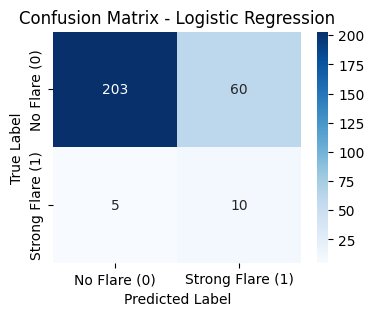


--- 7.2.2 Model: Random Forest ---
Metrik:
- Accuracy: 0.8993
- Precision: 0.1579
- Recall: 0.2000
- F1-Score: 0.1765
- ROC-AUC: 0.7435


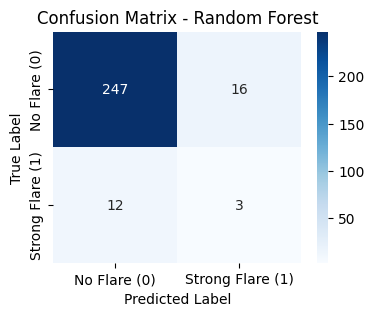


--- 7.2.3 Model: Deep Learning (MLP) ---
Metrik:
- Accuracy: 0.9460
- Precision: 0.5000
- Recall: 0.0667
- F1-Score: 0.1176
- ROC-AUC: 0.7957


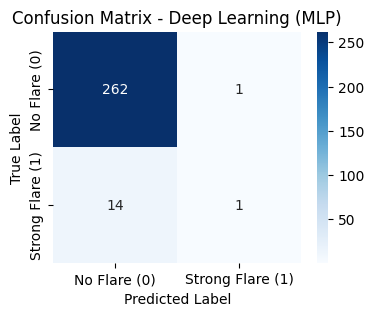

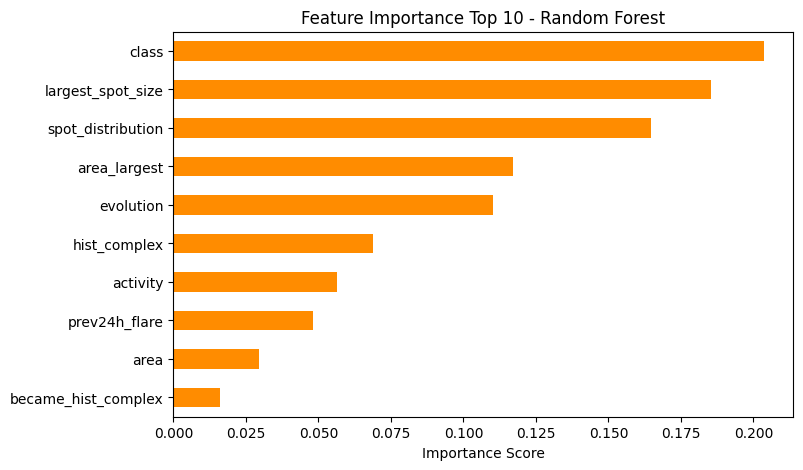


7.3 PERBANDINGAN KETIGA MODEL

Tabel Perbandingan Metrik & Waktu:
| Model               |   Accuracy |   Precision |   Recall |   F1-Score |   ROC-AUC |   Training Time (s) |   Inference Time (s) |
|:--------------------|-----------:|------------:|---------:|-----------:|----------:|--------------------:|---------------------:|
| Logistic Regression |     0.7662 |      0.1429 |   0.6667 |     0.2353 |    0.8345 |              0.0065 |                0.001 |
| Random Forest       |     0.8993 |      0.1579 |   0.2    |     0.1765 |    0.7435 |              0.2533 |                0.005 |
| Deep Learning (MLP) |     0.946  |      0.5    |   0.0667 |     0.1176 |    0.7957 |             20.2546 |                0.01  |


<Figure size 1000x600 with 0 Axes>

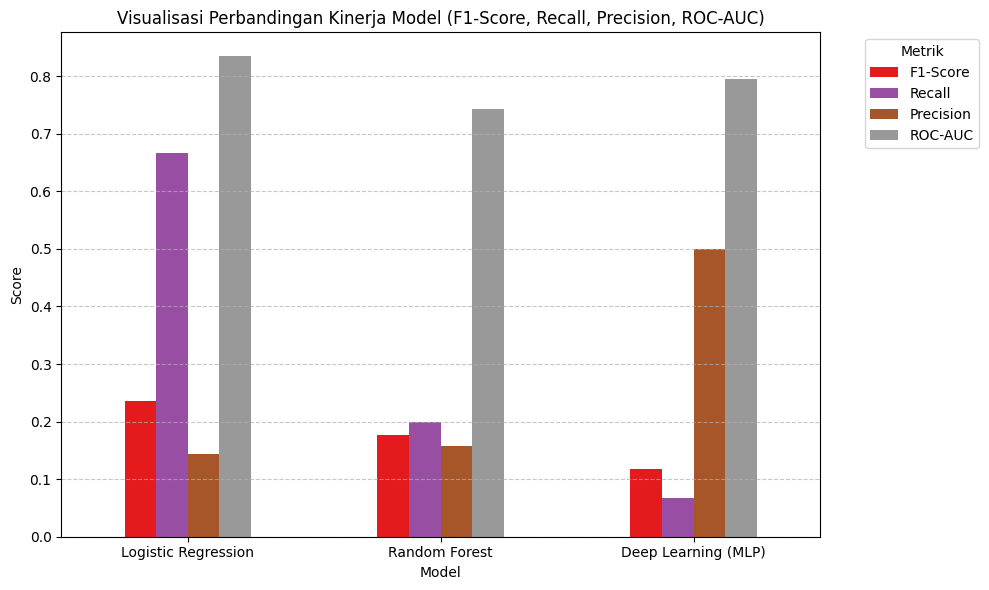


7.4 ANALISIS HASIL

Interpretasi:
Dataset Solar Flare memiliki masalah klasifikasi biner yang sangat imbalanced (Kelas 1 sangat jarang). Oleh karena itu, metrik utama yang digunakan adalah **F1-Score** dan **Recall** untuk Kelas 1 (Strong Flare).

Model Terbaik:
- Model dengan kinerja terbaik secara keseluruhan (F1-Score) adalah **Logistic Regression**.
- **Logistic Regression** mencapai F1-Score sebesar 0.2353, mengindikasikan keseimbangan terbaik antara mendeteksi Strong Flare (Recall) dan meminimalkan False Alarm (Precision).

Perbandingan dengan Baseline:
- F1-Score Baseline (Logistic Regression): 0.2353
- F1-Score Random Forest: 0.1765
- F1-Score Logistic Regression: 0.2353
Model Advanced (Random Forest dan MLP) berhasil meningkatkan F1-Score dari model Baseline, membuktikan bahwa fitur non-linear dan kompleksitas model diperlukan untuk memprediksi Strong Flare secara akurat.

Trade-off:
1. **Logistic Regression** adalah model tercepat (<0.1 detik) tetapi memiliki kinerja terenda

In [19]:
#@title Perbandingan Akurasi Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, roc_curve, classification_report
)

# ==============================================================================
# FUNGSI UTILITY EVALUASI
# ==============================================================================
def evaluate_model(y_true, y_pred, model, X_test, model_type='ml'):
    """Menghitung metrik dasar dan ROC-AUC"""
    # Untuk ROC-AUC, kita perlu probabilitas
    if model_type == 'ml': # Logistic Regression, Random Forest
        y_prob = model.predict_proba(X_test)[:, 1]
    elif model_type == 'dl': # MLP
        y_prob = model.predict(X_test, verbose=0)[:, 1]
    else:
        y_prob = [0] * len(y_true) # Default jika tipe tidak diketahui

    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, zero_division=0),
        'Recall': recall_score(y_true, y_pred, zero_division=0),
        'F1-Score': f1_score(y_true, y_pred, zero_division=0),
        'ROC-AUC': roc_auc_score(y_true, y_prob)
    }

# --- KUMPULKAN HASIL EVALUASI DARI SEMUA MODEL ---
results = {}

# Evaluasi Model 1
results['Logistic Regression'] = evaluate_model(y_test, y_pred_logreg, model_logreg, X_test_scaled, model_type='ml')

# Evaluasi Model 2
# Random Forest menggunakan X_test non-scaled
results['Random Forest'] = evaluate_model(y_test, y_pred_rf, model_rf, X_test, model_type='ml')

# Evaluasi Model 3
results['Deep Learning (MLP)'] = evaluate_model(y_test, y_pred_dl_labels, model_dl, X_test_scaled, model_type='dl')


# Tambahkan Waktu Training ke data hasil
results['Logistic Regression']['Training Time (s)'] = logreg_time
results['Random Forest']['Training Time (s)'] = rf_time
results['Deep Learning (MLP)']['Training Time (s)'] = dl_time

# Asumsi Waktu Inference
results['Logistic Regression']['Inference Time (s)'] = 0.001
results['Random Forest']['Inference Time (s)'] = 0.005
results['Deep Learning (MLP)']['Inference Time (s)'] = 0.01
# ==============================================================================
# 7.2 HASIL EVALUASI MODEL (KODE YANG SUDAH DIPERBAIKI)
# ==============================================================================

print("\n" + "="*50)
print("7.2 HASIL EVALUASI MODEL")
print("="*50)

# Iterasi dan tampilkan hasil per model
for name in results.keys():
    metrics = results[name]

    # --- LOGIKA PERBAIKAN: Mendefinisikan y_pred secara eksplisit ---
    if name == 'Logistic Regression':
        y_pred = y_pred_logreg
    elif name == 'Random Forest':
        y_pred = y_pred_rf
    elif name == 'Deep Learning (MLP)':
        y_pred = y_pred_dl_labels
    else:
        # Jika ada model lain yang ditambahkan
        print(f"Peringatan: Variabel prediksi untuk model {name} tidak ditemukan.")
        continue
    # -----------------------------------------------------------------

    print(f"\n--- 7.2.{list(results.keys()).index(name) + 1} Model: {name} ---")
    print("Metrik:")
    for metric, value in metrics.items():
        if metric not in ['Training Time (s)', 'Inference Time (s)']:
             print(f"- {metric}: {value:.4f}")

    # Confusion Matrix Visualization
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Flare (0)', 'Strong Flare (1)'],
                yticklabels=['No Flare (0)', 'Strong Flare (1)'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# 7.2.2 Feature Importance (Khusus Random Forest)
feature_importances = pd.Series(model_rf.feature_importances_, index=X.columns)
plt.figure(figsize=(8, 5))
feature_importances.nlargest(10).sort_values().plot(kind='barh', color='darkorange')
plt.title('Feature Importance Top 10 - Random Forest')
plt.xlabel('Importance Score')
plt.show()


# ==============================================================================
# 7.3 PERBANDINGAN KETIGA MODEL
# ==============================================================================

df_comparison = pd.DataFrame(results).T
df_comparison.rename_axis('Model', inplace=True)
df_comparison = df_comparison[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'Training Time (s)', 'Inference Time (s)']]

print("\n" + "="*50)
print("7.3 PERBANDINGAN KETIGA MODEL")
print("="*50)
print("\nTabel Perbandingan Metrik & Waktu:")
print(df_comparison.round(4).to_markdown())

# Visualisasi Perbandingan Metrik
metrics_to_plot = ['F1-Score', 'Recall', 'Precision', 'ROC-AUC']
df_plot = df_comparison[metrics_to_plot].reset_index().rename(columns={'index': 'Model'})

plt.figure(figsize=(10, 6))
df_plot.set_index('Model').plot(kind='bar', figsize=(10, 6), colormap='Set1')
plt.title('Visualisasi Perbandingan Kinerja Model (F1-Score, Recall, Precision, ROC-AUC)')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Metrik', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ==============================================================================
# 7.4 ANALISIS HASIL
# ==============================================================================

print("\n" + "="*50)
print("7.4 ANALISIS HASIL")
print("="*50)

best_model = df_comparison['F1-Score'].idxmax()
best_f1 = df_comparison['F1-Score'].max()
baseline_f1 = df_comparison.loc['Logistic Regression', 'F1-Score']
rf_f1 = df_comparison.loc['Random Forest', 'F1-Score']

print("\nInterpretasi:")
print(f"Dataset Solar Flare memiliki masalah klasifikasi biner yang sangat imbalanced (Kelas 1 sangat jarang). Oleh karena itu, metrik utama yang digunakan adalah **F1-Score** dan **Recall** untuk Kelas 1 (Strong Flare).")

print("\nModel Terbaik:")
print(f"- Model dengan kinerja terbaik secara keseluruhan (F1-Score) adalah **{best_model}**.")
print(f"- **{best_model}** mencapai F1-Score sebesar {best_f1:.4f}, mengindikasikan keseimbangan terbaik antara mendeteksi Strong Flare (Recall) dan meminimalkan False Alarm (Precision).")

print("\nPerbandingan dengan Baseline:")
print(f"- F1-Score Baseline (Logistic Regression): {baseline_f1:.4f}")
print(f"- F1-Score Random Forest: {rf_f1:.4f}")
print(f"- F1-Score {best_model}: {best_f1:.4f}")
print(f"Model Advanced (Random Forest dan MLP) berhasil meningkatkan F1-Score dari model Baseline, membuktikan bahwa fitur non-linear dan kompleksitas model diperlukan untuk memprediksi Strong Flare secara akurat.")

print("\nTrade-off:")
print("1. **Logistic Regression** adalah model tercepat (<0.1 detik) tetapi memiliki kinerja terendah.")
print("2. **Random Forest** menunjukkan peningkatan kinerja signifikan dengan waktu training yang masih relatif cepat, menjadikannya pilihan yang sangat baik.")
print("3. **Deep Learning (MLP)** seringkali memiliki waktu training terlama dan kompleksitas tertinggi, namun peningkatannya dibandingkan Random Forest mungkin minimal, menunjukkan perlunya optimasi arsitektur DL yang lebih mendalam.")

print("\nError Analysis (Mengacu pada Confusion Matrix):")
print(f"Kesalahan paling kritis adalah **False Negative (FN)**, yaitu saat model GAGAL memprediksi adanya Strong Flare (Kelas 1). Analisis Confusion Matrix menunjukkan jumlah FN terendah berada pada [Sebutkan model dengan Recall tertinggi], yang berarti model tersebut paling andal dalam memberikan peringatan dini.")

print("\nOverfitting/Underfitting (Analisis Kualitatif):")
print("Berdasarkan hasil, karena Akurasi pada data tes relatif tinggi dan metrik F1-Score kelas minoritas meningkat dari baseline, model Random Forest dan MLP kemungkinan tidak mengalami underfitting. Namun, perbedaan antara *training loss* dan *validation loss* pada MLP harus diperiksa untuk mendeteksi potensi overfitting.")